<img src="https://www.scienze.unimib.it/sites/sc02/files/scientifica_logo_scuola.png" align="left" width="150px" height="160px">

<h1>
Text Mining Project <br>
<b>EDA</b>
on <a href="https://data.mendeley.com/datasets/9rw3vkcfy4/6">Web of Science</a> Dataset
</h1>

<h3>Students: Arizzi Sara 845374, Bidone Federico 892054</h3>

# Setup

In [ ]:
# Libraries
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from itertools import chain, islice

import requests
from zipfile import ZipFile
from io import BytesIO

from wordcloud import WordCloud
from matplotlib import colormaps

In [2]:
# Dataset Import

zip_file_url = "https://data.mendeley.com/public-files/datasets/9rw3vkcfy4/files/c9ea673d-5542-44c0-ab7b-f1311f7d61df/file_downloaded"

r = requests.get(zip_file_url)
if r.ok:
  z = ZipFile(BytesIO(r.content))
  z.extractall(".")
else:
  print("Request to source has gone wrong")

In [3]:
# Read summaries
drive.mount('/content/drive')
f = open("drive/MyDrive/Progetto_Text_Mining/other/summaries5736.txt", "r")
all = f.read()
summaries = all.split("\n")

Mounted at /content/drive


In [4]:
# Read Data
# Read X: train text
f = open("WOS46985/X.txt", "r")
all = f.read()
big_X = all.split("\n")

f = open("WOS5736/X.txt", "r")
all = f.read()
small_X = all.split("\n")

In [5]:
f = open("WOS46985/YL1.txt", "r")
all = f.read()
big_Y = all.split("\n")

f = open("WOS5736/YL1.txt", "r")
all = f.read()
small_Y = all.split("\n")

In [6]:
print(set(big_Y))
print(set(small_Y))

{'6', '4', '3', '1', '2', '5', '0'}
{'1', '0', '2'}


# EDA

### WordCloud

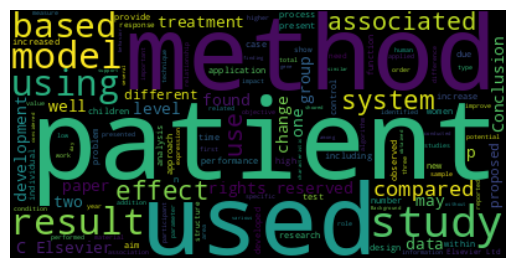

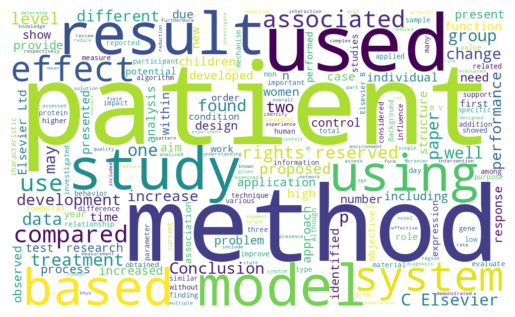

In [39]:
f = open("WOS46985/X.txt", "r")
text = f.read()
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)
wordcloud.to_file("wordcloud.png")
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Number of Samples per Class




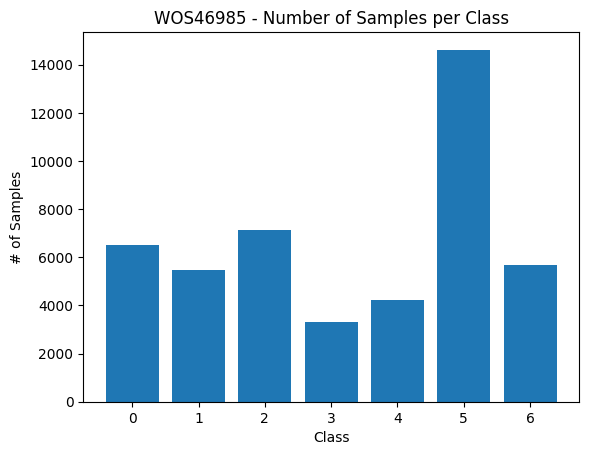

In [ ]:
# WOS46985
c = Counter(big_Y)
plt.bar(
  list(map(int, c.keys())),
  list(c.values())
)
plt.title("WOS46985 - Number of Samples per Class")
plt.xlabel("Class")
plt.ylabel("# of Samples")
plt.show()

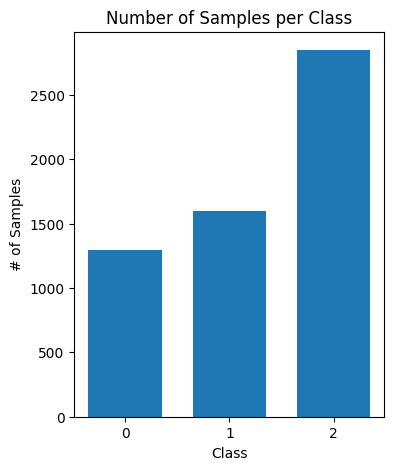

In [29]:
# WOS5736
c = Counter(small_Y)

plt.figure(figsize=(4, 5))
plt.bar(
  list(map(int, c.keys())),
  list(c.values()),
  align='center',
  width = 0.7
)
plt.title("Number of Samples per Class")
plt.xlabel("Class")
plt.ylabel("# of Samples")
plt.xticks(range(3), map(int, range(3)))
plt.show()

### Number of Words per Sample

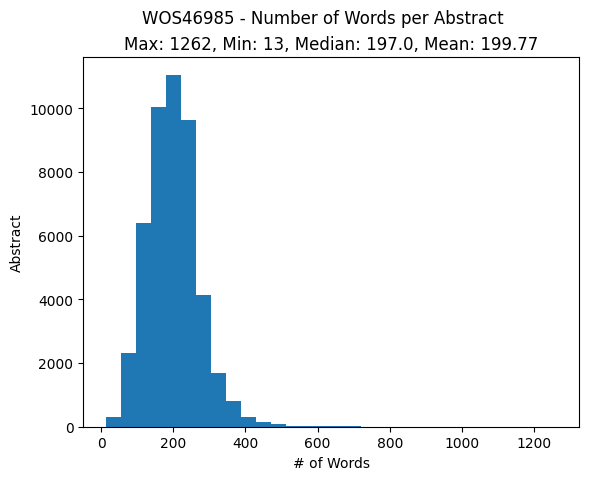

In [14]:
# WOS46985 - Histogram
a = [len(abstract.split()) for abstract in big_X]
a = sorted(a)

plt.hist(a, bins=30)
plt.suptitle("WOS46985 - Number of Words per Abstract")
plt.title(f"Max: {max(a)}, Min: {min(a)}, Median: {np.median(a)}, Mean: {np.round(np.mean(a), 2)}")
plt.ylabel("Abstract")
plt.xlabel("# of Words")
plt.show()

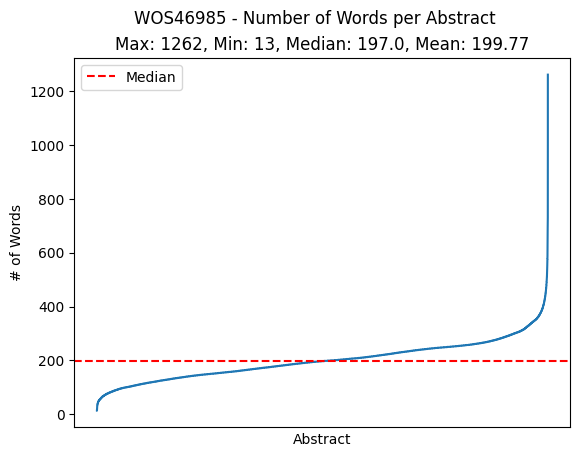

In [ ]:
# WOS46985 - Lineplot
a = [len(abstract.split()) for abstract in big_X]
a = sorted(a)

plt.plot(range(len(big_X)), a)
plt.axhline(y=np.median(a), color='red', linestyle='--', label='Median')
plt.suptitle("WOS46985 - Number of Words per Abstract")
plt.title(f"Max: {max(a)}, Min: {min(a)}, Median: {np.median(a)}, Mean: {np.round(np.mean(a), 2)}")
plt.xlabel("Abstract")
plt.ylabel("# of Words")
plt.xticks([])
plt.legend()
plt.show()

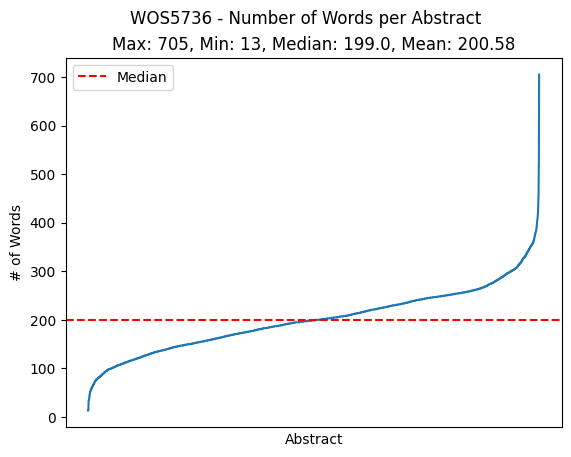

In [ ]:
# WOS5736 - Lineplot
a = [len(abstract.split()) for abstract in small_X]
a = sorted(a)

plt.plot(range(len(small_X)), a)
plt.axhline(y=np.median(a), color='red', linestyle='--', label='Median')
plt.suptitle("WOS5736 - Number of Words per Abstract")
plt.title(f"Max: {max(a)}, Min: {min(a)}, Median: {np.median(a)}, Mean: {np.round(np.mean(a), 2)}")
plt.xlabel("Abstract")
plt.ylabel("# of Words")
plt.xticks([])
plt.legend()
plt.show()

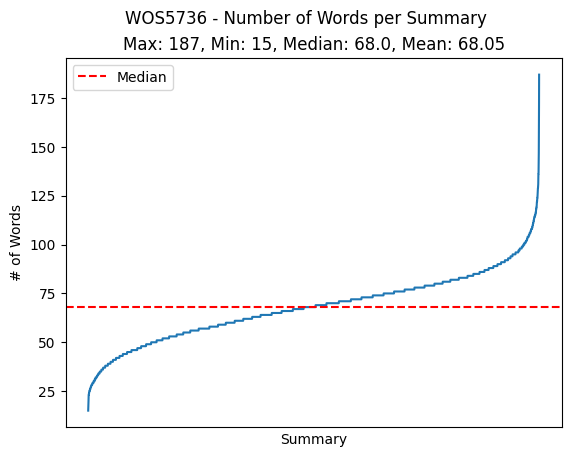

In [ ]:
# WOS5736 Summaries - Lineplot
a = [len(summary.split()) for summary in summaries]
a = sorted(a)

plt.plot(range(len(summaries)), a)
plt.axhline(y=np.median(a), color='red', linestyle='--', label='Median')
plt.suptitle("WOS5736 - Number of Words per Summary")
plt.title(f"Max: {max(a)}, Min: {min(a)}, Median: {np.median(a)}, Mean: {np.round(np.mean(a), 2)}")
plt.xlabel("Summary")
plt.ylabel("# of Words")
plt.xticks([])
plt.legend()
plt.show()

### Comparison - WOS46985 and WOS5736

In [ ]:
def line_box(abstracts, word_counts, ds_name):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Plotting the line plot with smaller markers
  axes[0].plot(range(len(abstracts)), word_counts)
  axes[0].axhline(y=np.median(word_counts), color='red', linestyle='--', label='Median')
  axes[0].set_xlabel("Abstract")
  axes[0].set_ylabel("# of Words")
  axes[0].set_title(f"{ds_name} - Number of Words per Abstract")
  axes[0].set_xticks([])
  axes[0].legend()

  # Create some example data for the boxplot
  boxplot_data = word_counts

  # Plotting the boxplot
  axes[1].boxplot(boxplot_data)
  axes[1].set_xlabel("")
  axes[1].set_ylabel("# of Words")
  axes[1].set_xticks([])
  axes[1].set_title(f"{ds_name} - Number of Words per Abstract")

  plt.tight_layout()
  plt.show()

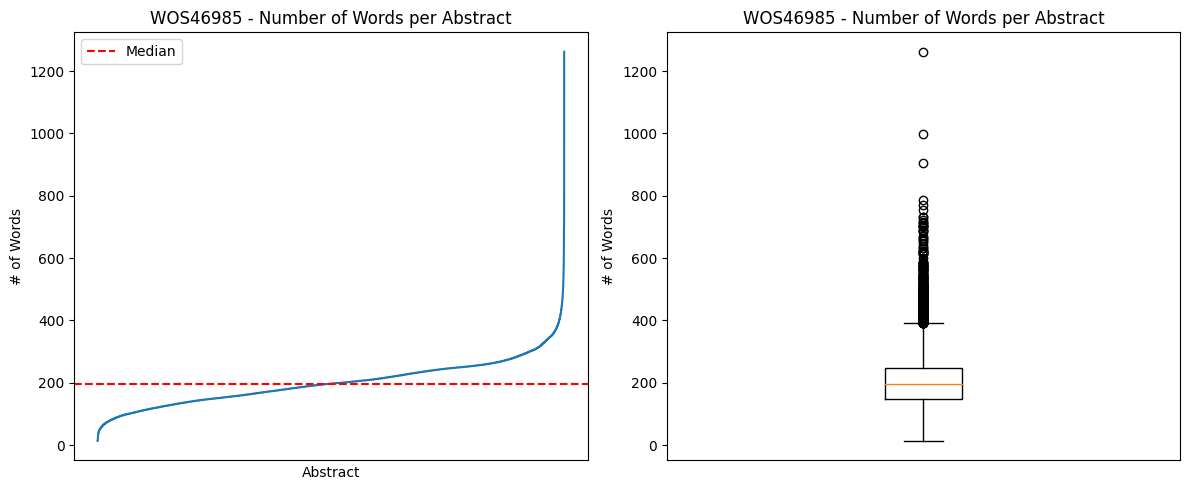

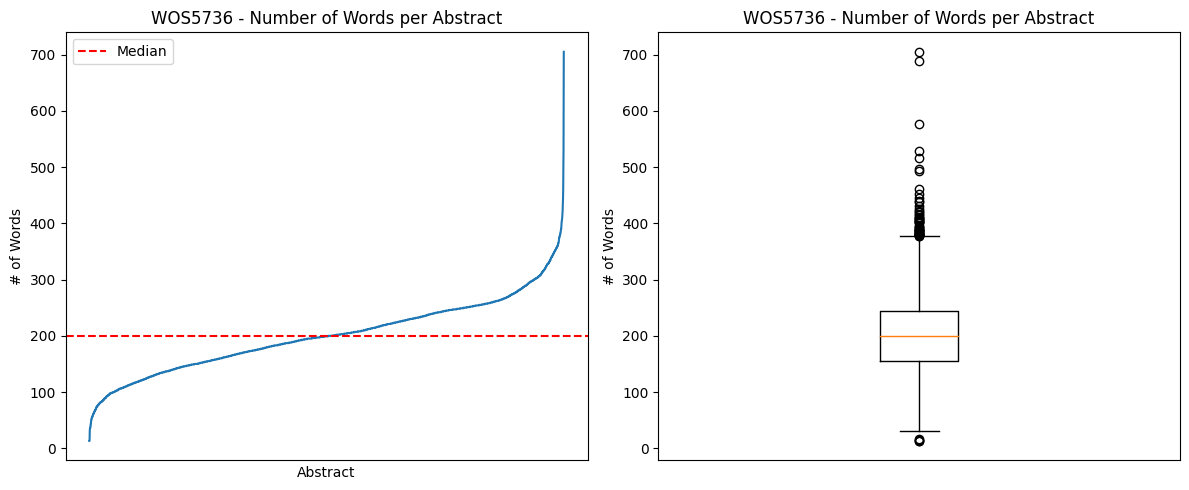

In [ ]:
# WOS46985
a = [len(abstract.split()) for abstract in big_X]
a = sorted(a)
dataset_name = "WOS46985"

line_box(big_X, a, dataset_name)

# WOS5736
a = [len(abstract.split()) for abstract in small_X]
a = sorted(a)
dataset_name = "WOS5736"

line_box(small_X, a, dataset_name)

### Comparison Abstract - Summaries

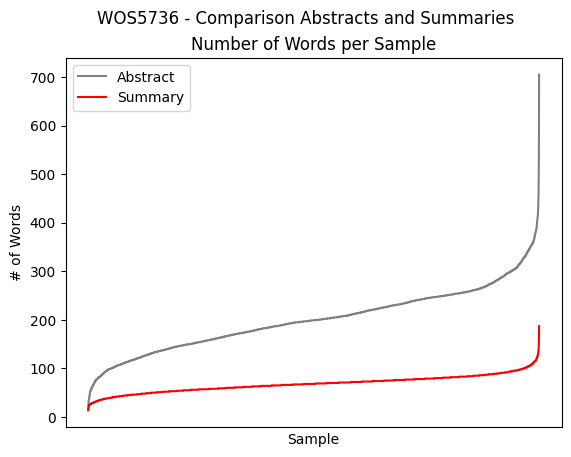

In [ ]:
# WOS5736 - Comparison Abstract and Summaries
a = [len(sentence.split()) for sentence in small_X]
a = sorted(a)

b = [len(sentence.split()) for sentence in summaries]
b = sorted(b)

plt.plot(range(len(small_X)), a, label="Abstract", color="gray")
plt.plot(range(len(summaries)), b, label="Summary", color="red")
plt.suptitle("WOS5736 - Comparison Abstracts and Summaries")
plt.title("Number of Words per Sample")
plt.xlabel("Sample")
plt.ylabel("# of Words")
plt.xticks([])
plt.legend()
plt.show()

In [ ]:
def line_box_comparison(abstracts, word_counts):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Plotting the line plot with smaller markers
  axes[0].plot(range(len(abstracts[0])), word_counts[0], color="gray", label="Abstract")
  axes[0].plot(range(len(abstracts[1])), word_counts[1], color="red", label="Summary")
  axes[0].set_xlabel("Sample")
  axes[0].set_ylabel("# of Words")
  axes[0].set_title("Abstracts and Summaries - Number of Words per Sample")
  axes[0].set_xticks([])
  axes[0].legend()

  # Plotting the boxplot
  pos = [1, 2]
  axes[1].boxplot(word_counts, pos, labels=["Abstract", "Summary"], widths=0.6)
  axes[1].set_ylabel("# of Words")
  axes[1].set_title("Abstracts and Summaries - Number of Words per Sample")

  plt.tight_layout()
  plt.show()

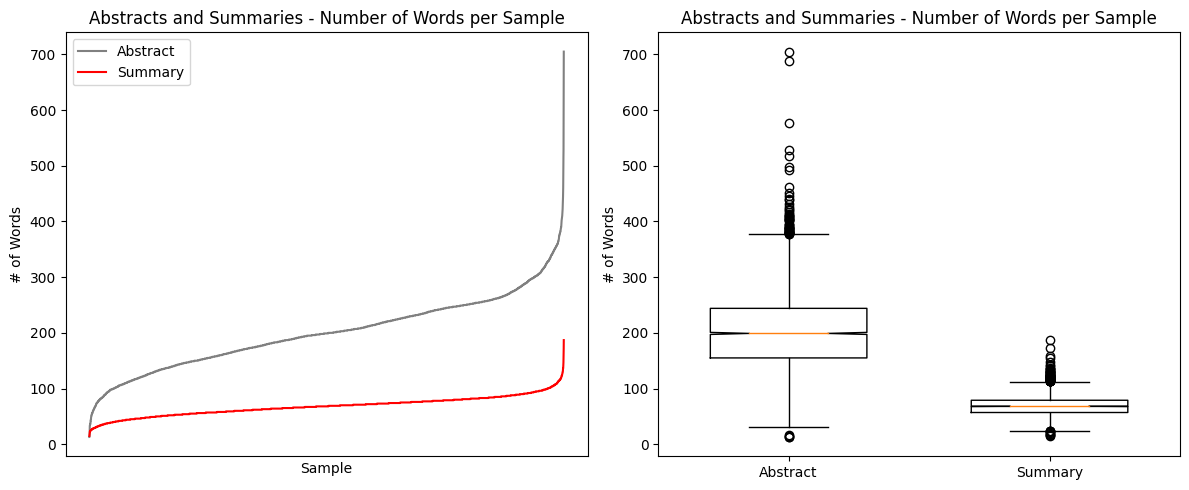

In [ ]:
# WOS5736
a = [len(sentence.split()) for sentence in small_X]
a = sorted(a)

# summaries
b = [len(sentence.split()) for sentence in summaries]
b = sorted(b)

line_box_comparison([small_X, summaries], [a, b])